In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [63]:
df=pd.read_csv(r'..\data\dataset_wTotal.csv')
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnt_total
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422


In [64]:
bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
labels = ['[0:20000]', '[20001:40000]', '[40001:60000]', '[60001:80000]', '[80001:100000]', '[100001: + ]']

df['income_class'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)
print(df[['income', 'income_class']].head())

    income   income_class
0  58138.0  [40001:60000]
1  46344.0  [40001:60000]
2  71613.0  [60001:80000]
3  26646.0  [20001:40000]
4  58293.0  [40001:60000]


In [65]:
df['income_class'] = df['income_class'].astype('object')


In [66]:
mnt_columns = [col for col in df.columns if col.startswith('mnt')]
df[mnt_columns].head()


,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,mnt_total
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


In [67]:
print(f"Taille du dataset avant suppression des outliers: {df.shape}")
cols_to_check = ['income', 'mnt_total']

Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df[cols_to_check] < lower_bound) | (df[cols_to_check] > upper_bound)).any(axis=1)]
print(f"Taille du dataset après suppression des outliers: {df.shape}")



Taille du dataset avant suppression des outliers: (2240, 31)
Taille du dataset après suppression des outliers: (2229, 31)


In [68]:
df['num_children'] = df[['teenhome', 'kidhome']].sum(axis=1)
print(df[['num_children']].head())

   num_children
0             0
1             2
2             0
3             1
4             1


In [69]:
df['num_children'] = df['num_children'].astype('category')


In [70]:
columns_to_sum = ['mntwines', 'mntmeatproducts', 'mntfishproducts', 'mntgoldprods']

df['mntpremium'] = df[columns_to_sum].sum(axis=1)
print(df[['mntwines', 'mntmeatproducts', 'mntfishproducts', 'mntgoldprods','mntpremium']].head())


   mntwines  mntmeatproducts  mntfishproducts  mntgoldprods  mntpremium
0       635              546              172            88        1441
1        11                6                2             6          25
2       426              127              111            42         706
3        11               20               10             5          46
4       173              118               46            15         352


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10768\4261030315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mntpremium', y=col, data=df_grouped, palette='viridis')


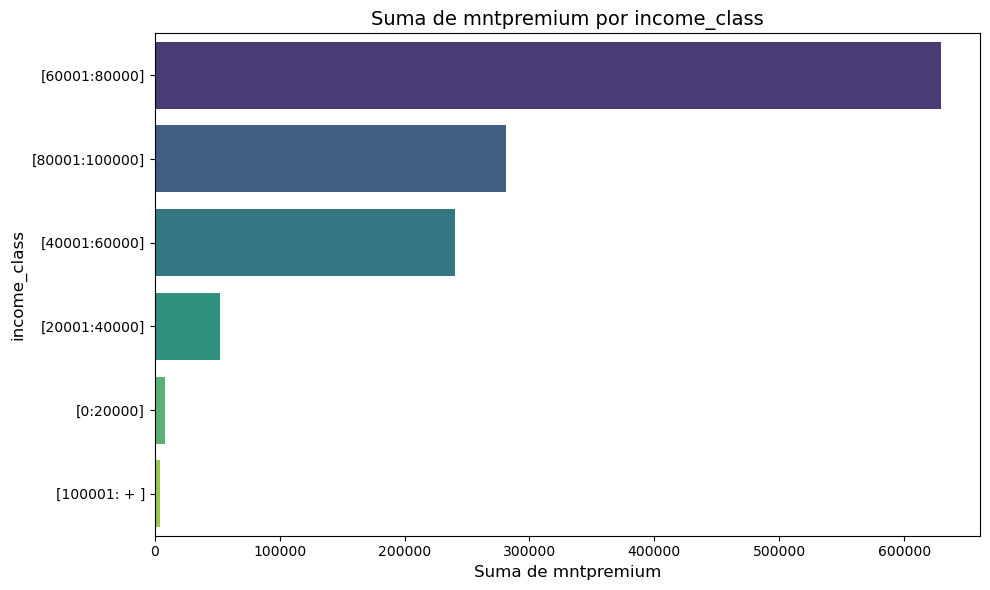

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10768\4261030315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mntpremium', y=col, data=df_grouped, palette='viridis')


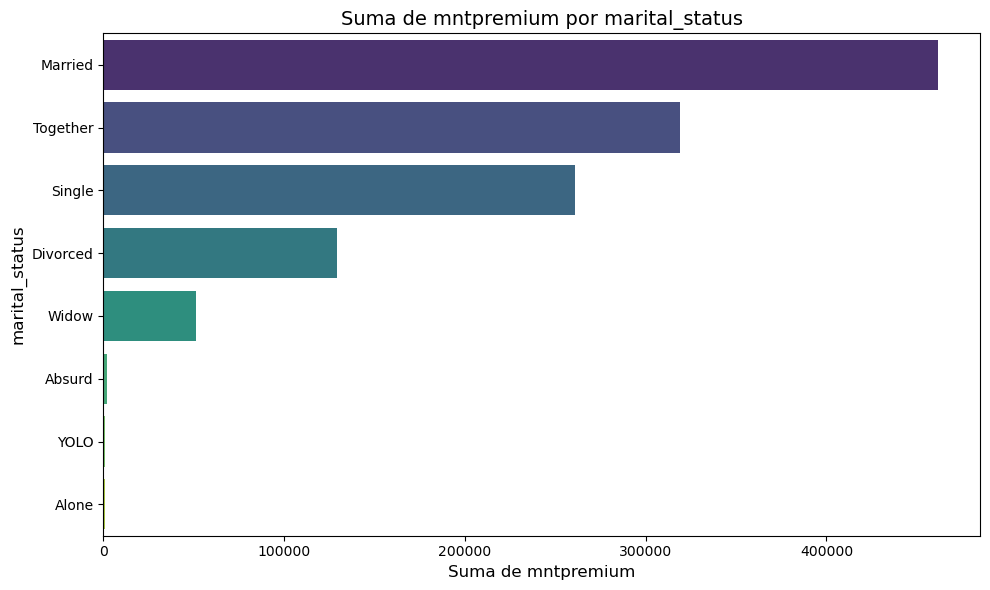

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10768\4261030315.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(col)['mntpremium'].sum().reset_index()
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10768\4261030315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mntpremium', y=col, data=df_grouped, palette='viridis')


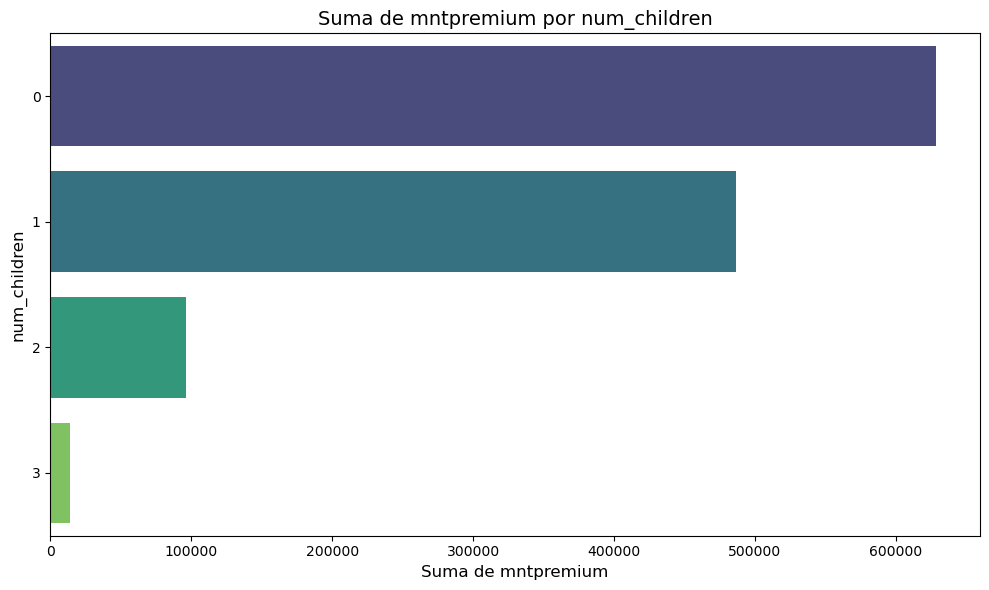

In [71]:
group_columns = ['income_class', 'marital_status','num_children' ]

for col in group_columns:
    df_grouped = df.groupby(col)['mntpremium'].sum().reset_index()
    df_grouped = df_grouped.sort_values(by='mntpremium', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='mntpremium', y=col, data=df_grouped, palette='viridis')
    
    plt.title(f"Suma de mntpremium por {col}", fontsize=14)
    plt.xlabel("Suma de mntpremium", fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.show()



En observando la distribución de los gastos en bienes premium, se puede constatar que:

La clase de ingresos entre 60,001 y 80,000 es la más importante.\
Las parejas son las que también tienen una fuerte preferencia por estos bienes\
Los hogares con 0 o 1 hijo también muestran una fuerte preferencia por estos bienes.